### Cleaning the Tripadvisor dataset

The dataset consist out of the scraped data from hotel reviews from the cities of Amsterdam, Rotterdam, Haarlemmermeer, The Hague, Utrecht, Almere, Eindhoven, Amstelveen, Groningen, Haarlem, Leiden, Maastricht, Enschede, Amersfoort and noordwijk.

### Import the Tripadvisor

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv(r'C:\Users\timo_\ta_scraper\ta_10juni.csv', delimiter=',')

In [65]:
#overview of the dataset
df.head()
df.sort_values(by=['hotel_name','helpful_count', 'publish_date'], ascending=True)

,url,hotel_name,review_title,review_text,helpful_count,publish_date
86135,https://www.tripadvisor.ca/ShowUserReviews-g18...,2L De Blend,Nice simple hotel,"After reading several online reviews, I was re...",1,"Reviewed February 1, 2019"
86132,https://www.tripadvisor.ca/ShowUserReviews-g18...,2L De Blend,Very dirty and unhygenic,Dirty room and bathroom. Immediately after che...,1,"Reviewed March 30, 2019"
86134,https://www.tripadvisor.ca/ShowUserReviews-g18...,2L De Blend,"No Support, No service, No communication",I was not informed by the agency that it's an ...,1,"Reviewed May 15, 2019"
86130,https://www.tripadvisor.ca/ShowUserReviews-g18...,2L De Blend,BE AWARE and avoid,They staff are coming inside the room during w...,2,"Reviewed January 2, 2019"
86133,https://www.tripadvisor.ca/ShowUserReviews-g18...,2L De Blend,Great stay,Great concept. I really love that there is a b...,NaN,"Reviewed December 3, 2020"
...,...,...,...,...,...,...
20241,https://www.tripadvisor.ca/ShowUserReviews-g18...,the niu Dairy,Like a 4 star hotel,Nice brand new hotel with very friendly staff....,NaN,"Reviewed November 20, 2018"
20242,https://www.tripadvisor.ca/ShowUserReviews-g18...,the niu Dairy,"Modern, friendly, centrally located - a great ...","Niu Dairy is trendy, clean, casual and friendl...",NaN,"Reviewed November 7, 2018"
20243,https://www.tripadvisor.ca/ShowUserReviews-g18...,the niu Dairy,"Close to shopping district, no car parking",We stayed 2 nights at this hotel. It’s a new m...,NaN,"Reviewed October 22, 2018"
20240,https://www.tripadvisor.ca/ShowUserReviews-g18...,the niu Dairy,Trendy Boutique Hotel,Only 15 minutes walk from the station this hot...,NaN,"Reviewed October 31, 2018"


### 1. Cleaning the dataset

Data cleaning is to process, fix or remove incorrect, corrupted, incorrectly formatted, duplicated or incomplete data within the dataset

#### 1.1. Remove unnecessary rows, words and characters from texts

In [66]:
#replace tabs
df['review_text'] = df['review_text'].str.replace('\t', ' ')

In [67]:
df.head()

,url,hotel_name,review_title,review_text,helpful_count,publish_date
0,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,Dont book here,They were very rude when requesting a cancella...,NaN,"Reviewed March 13, 2020"
1,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,"No privacy, smelly, just a room in somebody's ...",Aboslutely not advised if you are looking for ...,1,"Reviewed September 6, 2015"
2,NaN,Reedewaard Zorghotel,NaN,NaN,NaN,"Reviewed May 25, 2017"
3,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Piet Hein Eek,Beautiful hotel,The rooms are super beautiful and clean and th...,NaN,"Reviewed December 9, 2021"
4,NaN,Bed and Breakfast the Mermaid,NaN,NaN,NaN,"Reviewed February 13, 2018"


In [68]:
#delete empty reviews
df.isnull().sum()
df.dropna(subset = ['review_title'], inplace=True)

In [69]:
#All review have text
df.isnull().sum()

url                  0
hotel_name           0
review_title         0
review_text          0
helpful_count    57687
publish_date         0
dtype: int64

In [70]:
df.head()

,url,hotel_name,review_title,review_text,helpful_count,publish_date
0,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,Dont book here,They were very rude when requesting a cancella...,NaN,"Reviewed March 13, 2020"
1,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,"No privacy, smelly, just a room in somebody's ...",Aboslutely not advised if you are looking for ...,1,"Reviewed September 6, 2015"
3,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Piet Hein Eek,Beautiful hotel,The rooms are super beautiful and clean and th...,NaN,"Reviewed December 9, 2021"
5,https://www.tripadvisor.ca/ShowUserReviews-g18...,Auberge Nassau,"Good value, excellent room",The room was medium-sized with a double bed ma...,NaN,"Reviewed April 7, 2016"
6,https://www.tripadvisor.ca/ShowUserReviews-g18...,Winston B&B,Bad experience,After i travelled with my family a week throug...,NaN,"Reviewed May 2, 2022"


In [71]:
#remove 'Reviewed' from column
df['publish_date'] = df['publish_date'].str[9:]

In [72]:
df.head(20)

,url,hotel_name,review_title,review_text,helpful_count,publish_date
0,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,Dont book here,They were very rude when requesting a cancella...,NaN,"March 13, 2020"
1,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,"No privacy, smelly, just a room in somebody's ...",Aboslutely not advised if you are looking for ...,1,"September 6, 2015"
3,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Piet Hein Eek,Beautiful hotel,The rooms are super beautiful and clean and th...,NaN,"December 9, 2021"
5,https://www.tripadvisor.ca/ShowUserReviews-g18...,Auberge Nassau,"Good value, excellent room",The room was medium-sized with a double bed ma...,NaN,"April 7, 2016"
6,https://www.tripadvisor.ca/ShowUserReviews-g18...,Winston B&B,Bad experience,After i travelled with my family a week throug...,NaN,"May 2, 2022"
7,https://www.tripadvisor.ca/ShowUserReviews-g18...,Leonardo Royal Hotel Den Haag Promenade,My weekend get-away at Leonardo Hotel Promenad...,My expectations are always high when I return ...,NaN,"October 5, 2020"
8,https://www.tripadvisor.ca/ShowUserReviews-g18...,Leonardo Royal Hotel Den Haag Promenade,Night away in The Hague,Last weekend we spend a night at The Leonardo ...,NaN,"October 11, 2020"
9,https://www.tripadvisor.ca/ShowUserReviews-g18...,Postillion Hotel & Convention Centre WTC Rotte...,Wonderful stay!,"Room is spacious, very clean, it is just what ...",NaN,5 days ago
10,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,Avoid terrible hotel will never book again,"Room stank of smoke and sweat, the radiators o...",1,"March 2, 2022"
11,https://www.tripadvisor.ca/ShowUserReviews-g18...,Postillion Hotel & Convention Centre WTC Rotte...,Great Location and Comfortable Beds.,We were very happy with the location and the f...,NaN,"May 1, 2022"


#### 1.2. Correctly format the publish_dates column

To be able to make an extra row with the amount of days the review is published we need the date format with dd-mm-yyyy, so for example January 1 2020 has to be 1-1-2022.

In [73]:
#change writen dates to dd-mm-yyyy
df['publish_date'] = df['publish_date'].str.replace('January', '1')
df['publish_date'] = df['publish_date'].str.replace('February', '2')
df['publish_date'] = df['publish_date'].str.replace('March', '3')
df['publish_date'] = df['publish_date'].str.replace('April', '4')
df['publish_date'] = df['publish_date'].str.replace('May', '5')
df['publish_date'] = df['publish_date'].str.replace('June', '6')
df['publish_date'] = df['publish_date'].str.replace('July', '7')
df['publish_date'] = df['publish_date'].str.replace('August', '8')
df['publish_date'] = df['publish_date'].str.replace('September', '9')
df['publish_date'] = df['publish_date'].str.replace('October', '10')
df['publish_date'] = df['publish_date'].str.replace('November', '11')
df['publish_date'] = df['publish_date'].str.replace('December', '12')

In [74]:
#remove commas
df['publish_date'] = df['publish_date'].str.replace(',', '')

In [75]:
#replace week ago text
df['publish_date'] = df['publish_date'].str.replace('1 week ago', '5 13 2022')
df['publish_date'] = df['publish_date'].str.replace('2 weeks ago', '5 6 2022')
df['publish_date'] = df['publish_date'].str.replace('3 weeks ago', '4 29 2022')
df['publish_date'] = df['publish_date'].str.replace('4 weeks ago', '4 22 2022')

In [76]:
#data is now m-d-year, make normal dates from and count days
df['publish_date'] = df['publish_date'].str.replace(' ', '-')
df['publish_date'] = df['publish_date'].str[:-1]

In [77]:
#change type to datetime
from datetime import datetime
date_format = '%m-%d-%Y'
df.publish_date = pd.to_datetime(df.publish_date, format='%m-%d-%Y', errors='coerce')

In [78]:
#add date of today
df['date_today'] = '2022-05-19'

In [79]:
df.date_today = pd.to_datetime(df.date_today)


In [80]:
#calculate days of publishing
day_pub = df.date_today - df.publish_date
print(day_pub)

#create column with days published
df['days_published'] = day_pub

0        797 days
1       2447 days
3        161 days
5       2233 days
6         17 days
           ...   
89456   2860 days
89457   2733 days
89458   2913 days
89459   4749 days
89460   4081 days
Length: 86508, dtype: timedelta64[ns]


In [81]:
#make the column an integer
df['days_published'] = pd.to_numeric(df['days_published'].dt.days, downcast='integer')

In [82]:
#check isnulls in publishing date
df.isnull().sum()

url                   0
hotel_name            0
review_title          0
review_text           0
helpful_count     57687
publish_date        116
date_today            0
days_published      116
dtype: int64

In [83]:
#drop null
df.dropna(subset = ['publish_date'], inplace=True)

#### 1.3. Clean the helpful_count column

In [84]:
#turn no helpfull votens (NaN) into 0
df['helpful_count'] = df['helpful_count'].fillna(0)

In [85]:
#turn column into integer
df['helpful_count'] = df['helpful_count'].astype(int)

In [86]:
df['helpful_count'].describe()

count    86392.000000
mean         0.527665
std          1.563479
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        170.000000
Name: helpful_count, dtype: float64

In [87]:
#add column with word count
df['word_count'] = df.review_text.str.len()

In [88]:
df.head()

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,word_count
0,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,Dont book here,They were very rude when requesting a cancella...,0,2020-03-13,2022-05-19,797.0,233
1,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,"No privacy, smelly, just a room in somebody's ...",Aboslutely not advised if you are looking for ...,1,2015-09-06,2022-05-19,2447.0,249
3,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Piet Hein Eek,Beautiful hotel,The rooms are super beautiful and clean and th...,0,2021-12-09,2022-05-19,161.0,320
5,https://www.tripadvisor.ca/ShowUserReviews-g18...,Auberge Nassau,"Good value, excellent room",The room was medium-sized with a double bed ma...,0,2016-04-07,2022-05-19,2233.0,1608
6,https://www.tripadvisor.ca/ShowUserReviews-g18...,Winston B&B,Bad experience,After i travelled with my family a week throug...,0,2022-05-02,2022-05-19,17.0,598


### 2. EDA

The Exploratory Data Analysis (EDA) is to visualize the data and gives an better understanding of the dataset

In [89]:
#import visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 2.1. Scatterplot helpful votes

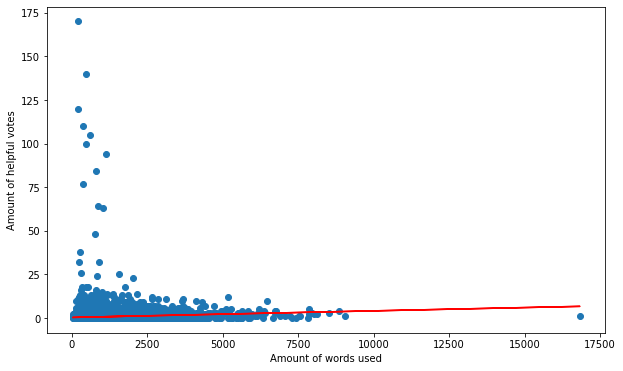

In [90]:
#plot of helpful count and word count
plt.figure(figsize=(10, 6))
plt.xlabel('Amount of words used')
plt.ylabel('Amount of helpful votes')

#scatterplot
x = df['word_count']
y = df['helpful_count']
plt.scatter(x, y)

#calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#display the Trendline
plt.plot(x, p(x), color ='red')


There is a correlation between the amount of words used and the amount of helpful votes. 

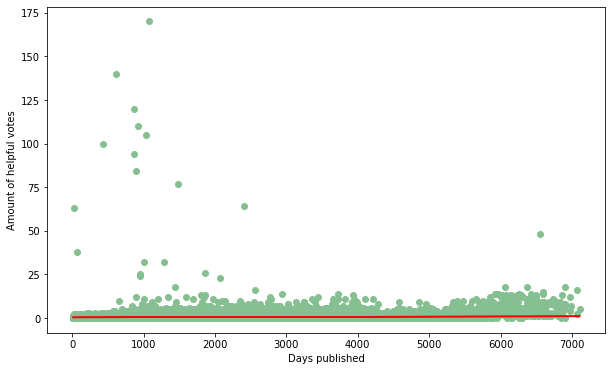

In [91]:
#plot of helpful count and days published
plt.figure(figsize=(10, 6))
plt.xlabel('Days published')
plt.ylabel('Amount of helpful votes')

#scatterplot
x = df['days_published']
y = df['helpful_count']
plt.scatter(x, y, color = '#86bf91')

#calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#display the Trendline
plt.plot(x, p(x), color ='red')

There seems to be a correlation between the amount of helpful votes and the days the review is published, but to be sure we will zoom in the graph in the next figure.

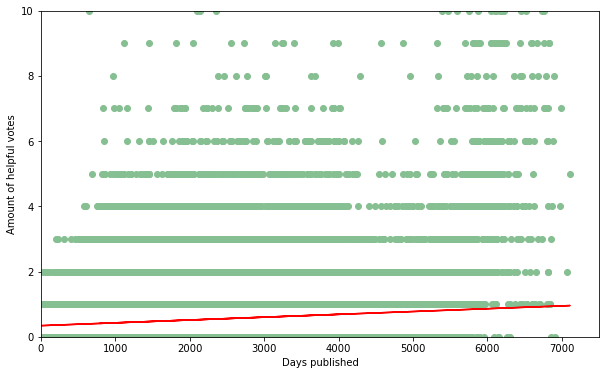

In [92]:
#plot of helpful count and days published (zoomed in)
plt.figure(figsize=(10, 6))
plt.axis([0, 7500, 0, 10])
plt.xlabel('Days published')
plt.ylabel('Amount of helpful votes')

#scatterplot
x = df['days_published']
y = df['helpful_count']
plt.scatter(x, y, color = '#86bf91')

#calculate the Trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#display the Trendline
plt.plot(x, p(x), color ='red')

After zooming in we see a small correlation between the helpful votes and days published.

#### 2.2. Distribution of helpful votes

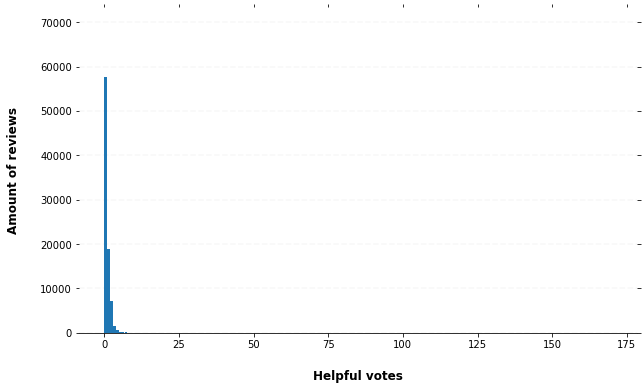

In [93]:
#Distribution of helpful reviews 
ax = df.hist(column='helpful_count', bins=175, grid=False, figsize=(10,6), zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Helpful votes", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Amount of reviews", labelpad=20, weight='bold', size=12)


In the dataset the amount of reviews that has 0 helpful votes far exceeds the reviews with an other amount of helpful votes. This makes it more difficult to see the distribution after 3 helpful votes. In the next cells we can get a better insight in the distrubution of the amount of helpful votes higher than 3.

In [94]:
#distribution of helpful votes
perc =[.25, .75, .90, .95,.98, .99, .995]
df['helpful_count'].describe(percentiles = perc)

count    86392.000000
mean         0.527665
std          1.563479
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          2.000000
95%          2.000000
98%          3.000000
99%          4.000000
99.5%        5.000000
max        170.000000
Name: helpful_count, dtype: float64

In [95]:
#percentage of reviews with 0 helpful votes
a = df.loc[df['helpful_count'] == 0,'helpful_count'].count()/df['helpful_count'].count()
print(f"Percentage {a*100}%")

Percentage 66.64042966941383%


In [96]:
#percentage of reviews with 1 helpful votes
b = df.loc[df['helpful_count'] == 1,'helpful_count'].count()/df['helpful_count'].count()
print(f"Percentage {b*100}%")

Percentage 21.831882581720528%


In [97]:
#percentage of reviews with 2 helpful votes
c = df.loc[df['helpful_count'] == 2,'helpful_count'].count()/df['helpful_count'].count()
print(f"Percentage {c*100}%")

Percentage 8.343365126400592%


In [98]:
#percentage of reviews with 2 helpful votes
c1 = df.loc[df['helpful_count'] >= 2,'helpful_count'].count()/df['helpful_count'].count()
print(f"Percentage {c1*100}%")

Percentage 11.527687748865635%


In [99]:
#percentage of reviews with 3 helpful votes
d = df.loc[df['helpful_count'] == 3,'helpful_count'].count()/df['helpful_count'].count()
print(f"Percentage {d*100}%")

Percentage 1.8809612001111216%


In [100]:
#percentage higher then 3
e = df.loc[df['helpful_count'] >= 3,'helpful_count'].count()/df['helpful_count'].count()
print(f"Percentage {e*100}%")

Percentage 3.1843226224650434%


#### 2.3. Low, Medium, High quality reviews

In [101]:
#give reviews 3 different labels
def label_quality(row):
    if row['helpful_count'] == 0 :
        return 'Low'
    if row['helpful_count'] == 1 :
        return 'Medium'
    if row['helpful_count'] == 2 :
        return 'Medium'
    if row['helpful_count'] == 3 :
        return 'Medium'
    if row['helpful_count'] == 4 :
        return 'Medium'
    if row['helpful_count'] >= 5 :
        return 'High'

df['quality'] = df.apply (lambda row: label_quality(row), axis=1)

In [102]:
df.head()

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,word_count,quality
0,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,Dont book here,They were very rude when requesting a cancella...,0,2020-03-13,2022-05-19,797.0,233,Low
1,https://www.tripadvisor.ca/ShowUserReviews-g80...,B&B Almere,"No privacy, smelly, just a room in somebody's ...",Aboslutely not advised if you are looking for ...,1,2015-09-06,2022-05-19,2447.0,249,Medium
3,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Piet Hein Eek,Beautiful hotel,The rooms are super beautiful and clean and th...,0,2021-12-09,2022-05-19,161.0,320,Low
5,https://www.tripadvisor.ca/ShowUserReviews-g18...,Auberge Nassau,"Good value, excellent room",The room was medium-sized with a double bed ma...,0,2016-04-07,2022-05-19,2233.0,1608,Low
6,https://www.tripadvisor.ca/ShowUserReviews-g18...,Winston B&B,Bad experience,After i travelled with my family a week throug...,0,2022-05-02,2022-05-19,17.0,598,Low


In [103]:
df['quality'].value_counts()

Low       57572
Medium    28216
High        604
Name: quality, dtype: int64

<AxesSubplot:xlabel='word_count', ylabel='quality'>

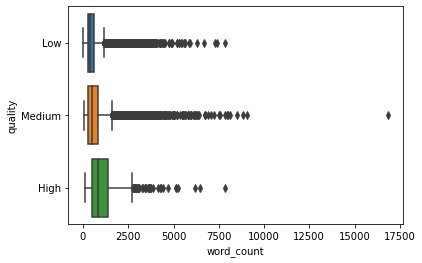

In [104]:
#boxplot of quality and word_count
sns.boxplot(y=df['quality'], x=df['word_count'])

<AxesSubplot:xlabel='days_published', ylabel='quality'>

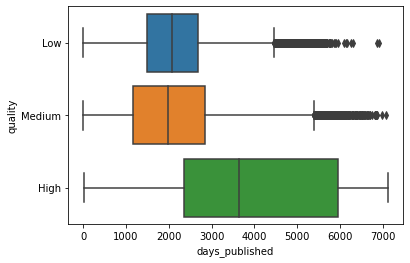

In [105]:
#boxplot of quality and days published
sns.boxplot(y=df['quality'], x=df['days_published'])

### 3. Create labeled, test and unlabeled for GAN-BERT

GAN-BERT requires a labeled, test and unlabeled dataset. The labeled dataset is used for the training of the GAN-BERT model. The labeled dataset require around 20% of the dataset and the test dataset the other 80%. The GAN-BERT model use the unlabeled dataset as examples to produce its own 'reviews'.

In [106]:
#split the dataset into 3 seperate datasets high, medium and low quality
high = df[df['helpful_count'] >= 5] 
medium= df[(df['helpful_count'] >= 1) & (df['helpful_count'] <= 4)] 
low = df[df['helpful_count'] == 0] 

In [107]:
high

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,word_count,quality
430,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Zenden Maastricht,Worst Hotel Experience Ever. Hotel Zenden Maas...,I wanted to take my mother and my 4 year old s...,11,2011-02-28,2022-05-19,4098.0,3675,High
461,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,It simply stinks!!,When I decided to book a single room in this t...,8,2003-10-14,2022-05-19,6792.0,692,High
462,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,Not so grand Grand!!,The Grand Hotel Central was probably a grand h...,8,2003-06-30,2022-05-19,6898.0,1213,High
463,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,DO NOT STAY IN THIS HOTEL OF NIGHTMARES,The most disgusting hotel I have ever encounte...,13,2004-08-09,2022-05-19,6492.0,1328,High
464,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,The worst hotel on earth?,"I'd heard this hotel wasn't great, but just ab...",9,2005-05-13,2022-05-19,6215.0,531,High
...,...,...,...,...,...,...,...,...,...,...
88399,https://www.tripadvisor.ca/ShowUserReviews-g18...,NH Utrecht,Value for money,This hotel is centrally located close to Utrec...,12,2019-12-15,2022-05-19,886.0,257,High
88430,https://www.tripadvisor.ca/ShowUserReviews-g18...,Bastion Hotel Utrecht,Please Don’t Go.,The ‘hotel’ is surrounded by an electric fence...,5,2017-07-09,2022-05-19,1775.0,1213,High
88664,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Holland Lodge,excellent and very kind,"near shopping mall, kids have fun, a playgarde...",6,2009-11-05,2022-05-19,4578.0,195,High
88811,https://www.tripadvisor.ca/ShowUserReviews-g80...,Van Der Valk Hotel Almere,"Nice place, good location... some drawbacks",Since the hotel opened in January 2001 we have...,5,2012-06-10,2022-05-19,3630.0,568,High


In [108]:
high['helpful_count'].describe

<bound method NDFrame.describe of 430       11
461        8
462        8
463       13
464        9
        ... 
88399     12
88430      5
88664      6
88811      5
89340    140
Name: helpful_count, Length: 604, dtype: int32>

In [109]:
medium['helpful_count'].describe

<bound method NDFrame.describe of 1        1
10       1
12       2
13       2
14       2
        ..
89385    1
89387    1
89390    1
89391    1
89392    1
Name: helpful_count, Length: 28216, dtype: int32>

In [110]:
high.head()

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,word_count,quality
430,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Zenden Maastricht,Worst Hotel Experience Ever. Hotel Zenden Maas...,I wanted to take my mother and my 4 year old s...,11,2011-02-28,2022-05-19,4098.0,3675,High
461,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,It simply stinks!!,When I decided to book a single room in this t...,8,2003-10-14,2022-05-19,6792.0,692,High
462,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,Not so grand Grand!!,The Grand Hotel Central was probably a grand h...,8,2003-06-30,2022-05-19,6898.0,1213,High
463,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,DO NOT STAY IN THIS HOTEL OF NIGHTMARES,The most disgusting hotel I have ever encounte...,13,2004-08-09,2022-05-19,6492.0,1328,High
464,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,The worst hotel on earth?,"I'd heard this hotel wasn't great, but just ab...",9,2005-05-13,2022-05-19,6215.0,531,High


#### 3.1. Create labeled and test dataset

Because the distubution of high and low quality reviews is so extreem, we have to balance the ratio between high and low quality reviews. In this section we will make a labeled and test datasets that will consist for 50% out of high and low quality reviews.

In [111]:
#Decide how many reviews of each quality you want in you dataset for GAN-BERT

#high quality data
h_20 = high.sample(n=100) 
h_data = high.drop(h_20.index) 
h_80 = h_data.sample(n=500)

#medium quality data
#m_20 = medium.sample(n=70) 
#m_data = medium.drop(m_20.index)
#m_80 = m_data.sample(n=335)

#low quality data
b_lab = low.sample(n=100)
b_test = low.sample(n=500)

In [112]:
h_80['review_word_count'] = h_80.review_text.str.len()


In [113]:
h_80

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,word_count,quality,review_word_count
51649,https://www.tripadvisor.ca/ShowUserReviews-g10...,Alp de Veenen Boutique Hotel,Questionable praises here,"Is this a 4 star hotel? Not really.,What's goo...",7,2014-06-01,2022-05-19,2909.0,760,High,760
6513,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel van der Valk Maastricht,Shameful “No Tap-water” Policy,The restaurant has a ridiculous “No tap-water”...,5,2019-01-23,2022-05-19,1212.0,1014,High,1014
16525,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Amadeus,Such a find,We had the good fortune of staying on the top ...,6,2005-10-10,2022-05-19,6065.0,467,High,467
70113,https://www.tripadvisor.ca/ShowUserReviews-g22...,Ibis Budget Amsterdam Airport,Si può avere di meglio,For 10 or more euro you can sleep in the near ...,8,2019-09-19,2022-05-19,973.0,223,High,223
43669,https://www.tripadvisor.ca/ShowUserReviews-g18...,Crown Inn,location,The hotel is average nothing fancy but clean a...,5,2005-09-03,2022-05-19,6102.0,324,High,324
...,...,...,...,...,...,...,...,...,...,...,...
8466,https://www.tripadvisor.ca/ShowUserReviews-g22...,Hotel de Koningshof Noordwijk,Excellent experience!!!,"Excellent service, rooms and location. Breakfa...",5,2011-06-28,2022-05-19,3978.0,177,High,177
88664,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Holland Lodge,excellent and very kind,"near shopping mall, kids have fun, a playgarde...",6,2009-11-05,2022-05-19,4578.0,195,High,195
11993,https://www.tripadvisor.ca/ShowUserReviews-g18...,De Doelen,Great place to stay,We spent two great weeks at the de Doelen and ...,10,2003-12-05,2022-05-19,6740.0,147,High,147
51655,https://www.tripadvisor.ca/ShowUserReviews-g18...,AMEDIA Hotel Amsterdam Airport,BEWARE OF TRANSFER FROM AIRPORT,I booked the hotel for the night before a flig...,10,2016-07-14,2022-05-19,2135.0,1110,High,1110


In [114]:
#combine data to make balanced dataset
h = [h_20, b_lab]
h1 = pd.concat(h)

g = [h_80, b_test]
g1 = pd.concat(g)

In [115]:
h1.describe()

,helpful_count,days_published,word_count
count,200.000000,200.000000,200.000000
mean,3.495000,3027.980000,783.205000
std,4.870171,1757.060842,776.216816
min,0.000000,152.000000,109.000000
25%,0.000000,1690.750000,302.000000
50%,2.500000,2459.000000,530.500000
75%,6.000000,3873.250000,954.750000
max,48.000000,6854.000000,6209.000000


In [116]:
g1.describe()

,helpful_count,days_published,word_count,review_word_count
count,1000.000000,1000.00000,1000.000000,500.000000
mean,4.562000,3003.87600,822.791000,1142.002000
std,11.513936,1762.16804,783.548263,945.849411
min,0.000000,6.00000,107.000000,147.000000
25%,0.000000,1700.25000,309.750000,523.500000
50%,2.500000,2517.50000,578.500000,875.500000
75%,6.000000,3906.75000,1014.250000,1419.250000
max,170.000000,7112.00000,7869.000000,7869.000000


In [121]:
# randomize the test dataset
g2 = g1.sample(n=1000)

#randomize the labeled dataset
h2 = h1.sample(200)

In [122]:
g2.head()

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,word_count,quality,review_word_count
72955,https://www.tripadvisor.ca/ShowUserReviews-g18...,citizenM Schiphol Airport,If only it worked,"I liked the idea of this hotel and, being a ce...",5,2009-01-17,2022-05-19,4870.0,1784,High,1784.0
21938,https://www.tripadvisor.ca/ShowUserReviews-g18...,NH Den Haag,NH is our home abroad.,"as we were on citytrip, it was a long walk to ...",0,2015-04-09,2022-05-19,2597.0,225,Low,NaN
23789,https://www.tripadvisor.ca/ShowUserReviews-g66...,Strandhotel Scheveningen,Cancellation Costs,I was forced to cancel a room at the same day ...,5,2011-06-09,2022-05-19,3997.0,693,High,693.0
35403,https://www.tripadvisor.ca/ShowUserReviews-g18...,ss Rotterdam,"Novel, but fundementals lacking","If you are lookig for pro-active, hospitbale a...",0,2013-11-13,2022-05-19,3109.0,1831,Low,NaN
9045,https://www.tripadvisor.ca/ShowUserReviews-g22...,Doubletree by Hilton Royal Parc Soestduinen,Excellent hotel for a romantic stay!,A very comfortable hotel with really helpful a...,0,2017-09-18,2022-05-19,1704.0,210,Low,NaN


In [123]:
# check how dataset is defided in quality
h2['quality'].value_counts()

High    100
Low     100
Name: quality, dtype: int64

In [124]:
g2['quality'].value_counts()

High    500
Low     500
Name: quality, dtype: int64

In [62]:
#Export to csv
#h2.to_csv("labeled_clas.csv", index=False)
#g2.to_csv("test_clas.csv", index=False)

#unlabeled dataset
#recent.to_csv("unlabeled_ta.csv", index-False)

#### 3.2 Create unlabeled dataset

The recent reviews will be used as unlabeled dataset, because we genuily do not know if these reviews are high and low quality and it assures that these reviews are not already in the test or trainingset because we drop the recent reviews in the GAN-BERT model.

In [154]:
# Create unlabeled dataset with recent reviews
recent = df[df['days_published'] <= 730] #unkown labelled are recently published because not a lot of time to acquire upvotes

print(f"No. of recent examples: {recent.shape[0]}")

No. of recent examples: 4607


In [155]:
#make unlabelled_dataset unlabelled (recent data is cannot reliably labeled due to unsufficient time to acquire helpful votes)
recent['quality'] = recent['quality'].str.replace('Low', 'UNK')
recent['quality'] = recent['quality'].str.replace('Moderate', 'UNK')
recent['quality'] = recent['quality'].str.replace('Medium', 'UNK')
recent['quality'] = recent['quality'].str.replace('Very High', 'UNK')
recent['quality'] = recent['quality'].str.replace('High', 'UNK')

C:\Users\timo_\AppData\Local\Temp\ipykernel_13772\1735845939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['quality'] = recent['quality'].str.replace('Low', 'UNK')
C:\Users\timo_\AppData\Local\Temp\ipykernel_13772\1735845939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent['quality'] = recent['quality'].str.replace('Moderate', 'UNK')
C:\Users\timo_\AppData\Local\Temp\ipykernel_13772\1735845939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [156]:
recent

,url,hotel_name,review_title,review_text,helpful_count,publish_date,date_today,days_published,quality
3,https://www.tripadvisor.ca/ShowUserReviews-g18...,Hotel Piet Hein Eek,Beautiful hotel,The rooms are super beautiful and clean and th...,0,2021-12-09,2022-05-19,161.0,UNK
6,https://www.tripadvisor.ca/ShowUserReviews-g18...,Winston B&B,Bad experience,After i travelled with my family a week throug...,0,2022-05-02,2022-05-19,17.0,UNK
7,https://www.tripadvisor.ca/ShowUserReviews-g18...,Leonardo Royal Hotel Den Haag Promenade,My weekend get-away at Leonardo Hotel Promenad...,My expectations are always high when I return ...,0,2020-10-05,2022-05-19,591.0,UNK
8,https://www.tripadvisor.ca/ShowUserReviews-g18...,Leonardo Royal Hotel Den Haag Promenade,Night away in The Hague,Last weekend we spend a night at The Leonardo ...,0,2020-10-11,2022-05-19,585.0,UNK
10,https://www.tripadvisor.ca/ShowUserReviews-g18...,Grand Hotel Central,Avoid terrible hotel will never book again,"Room stank of smoke and sweat, the radiators o...",1,2022-03-02,2022-05-19,78.0,UNK
...,...,...,...,...,...,...,...,...,...
89370,https://www.tripadvisor.ca/ShowUserReviews-g80...,Best Western Plus Plaza Almere,Stay Elsewhere!,While we were willing to sacrifice our standar...,0,2022-04-26,2022-05-19,23.0,UNK
89371,https://www.tripadvisor.ca/ShowUserReviews-g80...,Best Western Plus Plaza Almere,Centrally located hotel,The location is very central. The rooms are sp...,0,2021-09-14,2022-05-19,247.0,UNK
89372,https://www.tripadvisor.ca/ShowUserReviews-g80...,Best Western Plus Plaza Almere,Excellent centrally located hotel,"Comfortable room, sealed windows so reliant on...",2,2020-08-15,2022-05-19,642.0,UNK
89390,https://www.tripadvisor.ca/ShowUserReviews-g80...,ANNO,WORST PLACE.DONT GO THERE,The worst costumer service ive seen. Wesat in ...,1,2020-08-04,2022-05-19,653.0,UNK


### Export labeled, test and unlabeled dataset

In [157]:
#Export to csv
#h2.to_csv("labeled_clasc3.csv", index=False)
#g2.to_csv("test_clasc3.csv", index=False)

#unlabeled dataset
#recent.to_csv("unlabeled_ta.csv", index-False)

In [52]:
#export entire dataset to csv files
#df.to_csv('ta_clean_10jun.csv')